In [1]:
# Standard Python libraries
import os                                    # For accessing operating system functionalities
import json                                  # For encoding and decoding JSON data
import pickle                                # For serializing and de-serializing Python objects

# Libraries that can be pip installed
import requests                              # Simple Python library for HTTP
import pandas as pd                          # Library for building dataframes similar to those in R
import seaborn as sns                        # Statistical visualization library based on Matplotlib
import matplotlib.pyplot as plt              # MATLAB-like plotting, useful for interactive viz

# Utilities needed from Scikit-Learn, a robust, comprehensive machine learning library in Python.
# We'll discuss each of these in detail as we come to them in the tutorial.
from sklearn.pipeline import Pipeline
from sklearn.datasets.base import Bunch
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [12]:
# load CSV's into data frame
test  = pd.read_csv('../datasets/adult.test.csv', names = ["age","workclass","fnlwgt","education","education.num",
                                                              "marital.status","occupation", "relationship","race",
                                                              "sex","capital.gain","capital.loss","hours.per.week",
                                                              "native.country","income"])
data = pd.read_csv('../datasets/adult.data.csv', names = ["age","workclass","fnlwgt","education","education.num",
                                                              "marital.status","occupation", "relationship","race",
                                                              "sex","capital.gain","capital.loss","hours.per.week",
                                                              "native.country","income"])


(16282, 15)
(32561, 15)


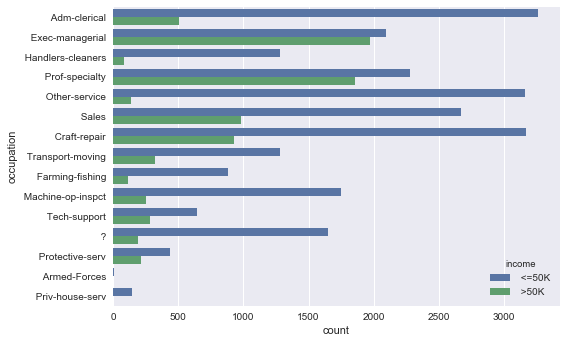

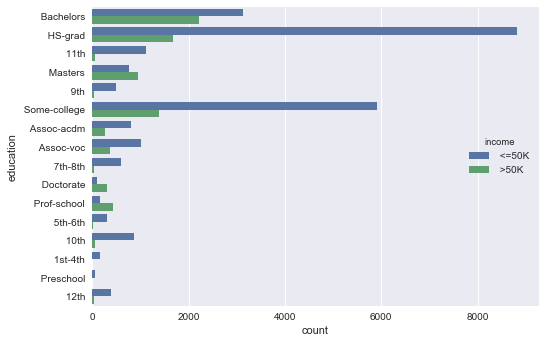

In [13]:
print(test_df.shape)
print(train_df.shape)
sns.countplot(y='occupation', hue='income', data=data,)
sns.plt.show()
sns.countplot(y='education', hue='income', data=data,)
sns.plt.show()

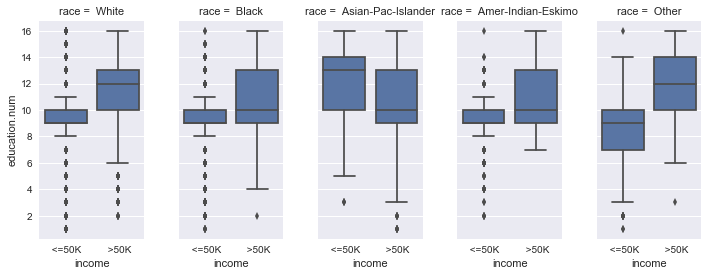

In [14]:
g = sns.FacetGrid(data, col='race', size=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'education.num')
sns.plt.show()

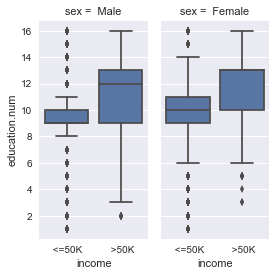

In [18]:
g = sns.FacetGrid(data, col='sex', size=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'education.num')
sns.plt.show()

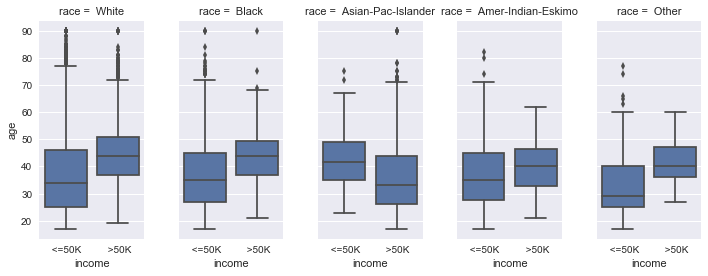

In [26]:
g = sns.FacetGrid(data, col='race', size=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'age')
sns.plt.show()

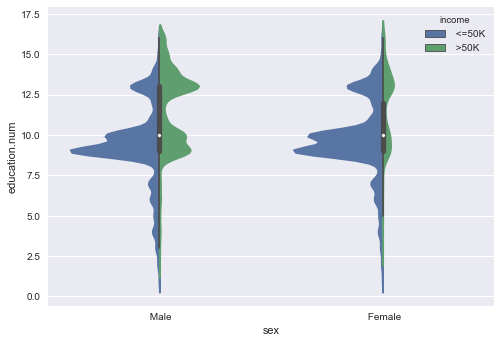

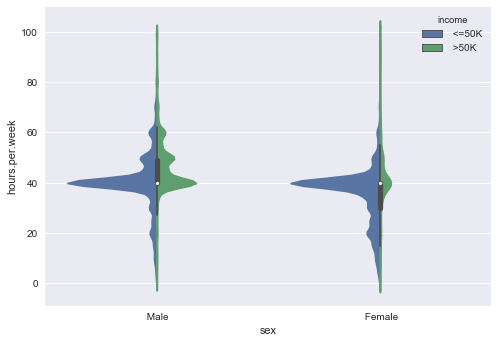

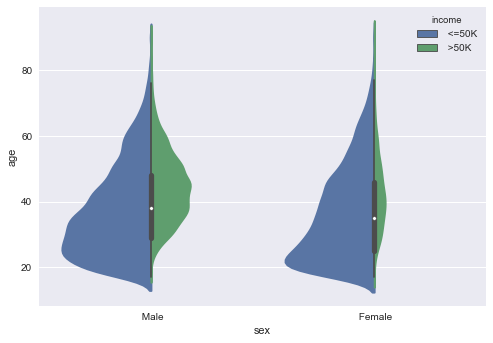

In [27]:
sns.violinplot(x='sex', y='education.num', hue='income', data=data, split=True, scale='count')
sns.plt.show()

sns.violinplot(x='sex', y='hours.per.week', hue='income', data=data, split=True, scale='count')
sns.plt.show()

sns.violinplot(x='sex', y='age', hue='income', data=data, split=True, scale='count')
sns.plt.show()

In [ ]:
test_df.drop(0, inplace="true")

In [15]:
test_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29,?,227026.0,HS-grad,9.0,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
8,63,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
9,24,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.


In [ ]:
train_df.isnull().sum().sum()

In [ ]:
missing_tests = test_df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)
missing_train = train_df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)

In [ ]:
#missing_tests.ix[:,0]
bad_indeces = missing_tests[missing_tests == True].index
test_df = test_df.drop(bad_indeces)
bad_indeces = missing_train[missing_train == True].index
train_df = train_df.drop(bad_indeces)


In [ ]:
train_df.dtypes

In [ ]:
train_df.income == <=50K